    Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
import cv2
import shutil
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
%matplotlib inline

    Visulaiser mes images 

        Plastic_clean

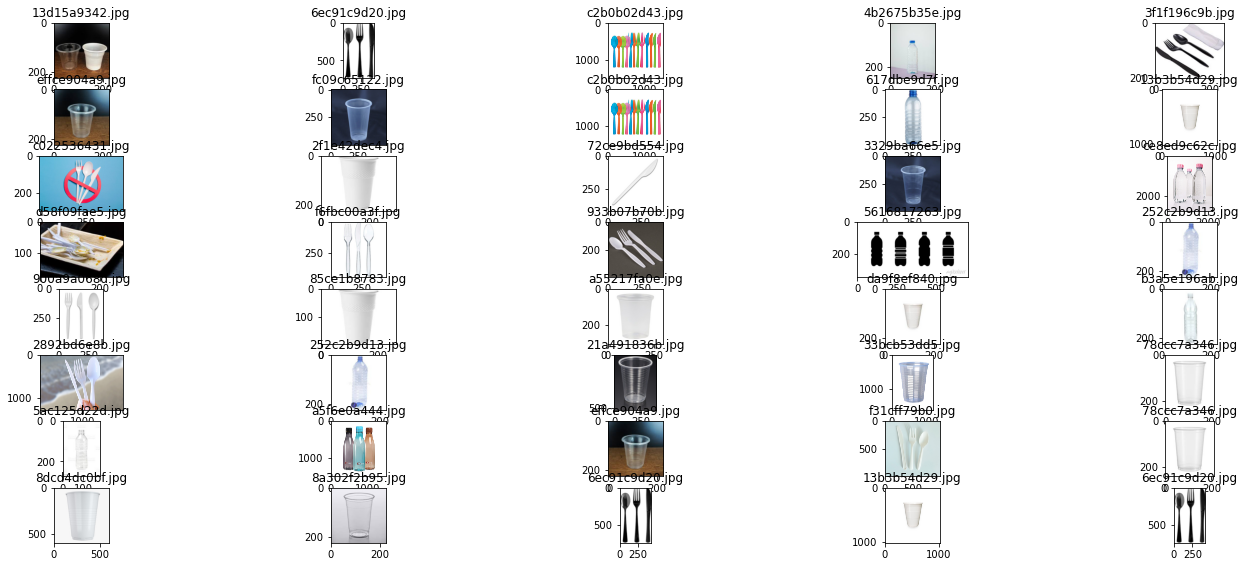

In [2]:
plt.figure(figsize=(24,12))
test_folder='/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set/plastic_clean'
for i in range(40):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(10,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

        Plastic_dirty

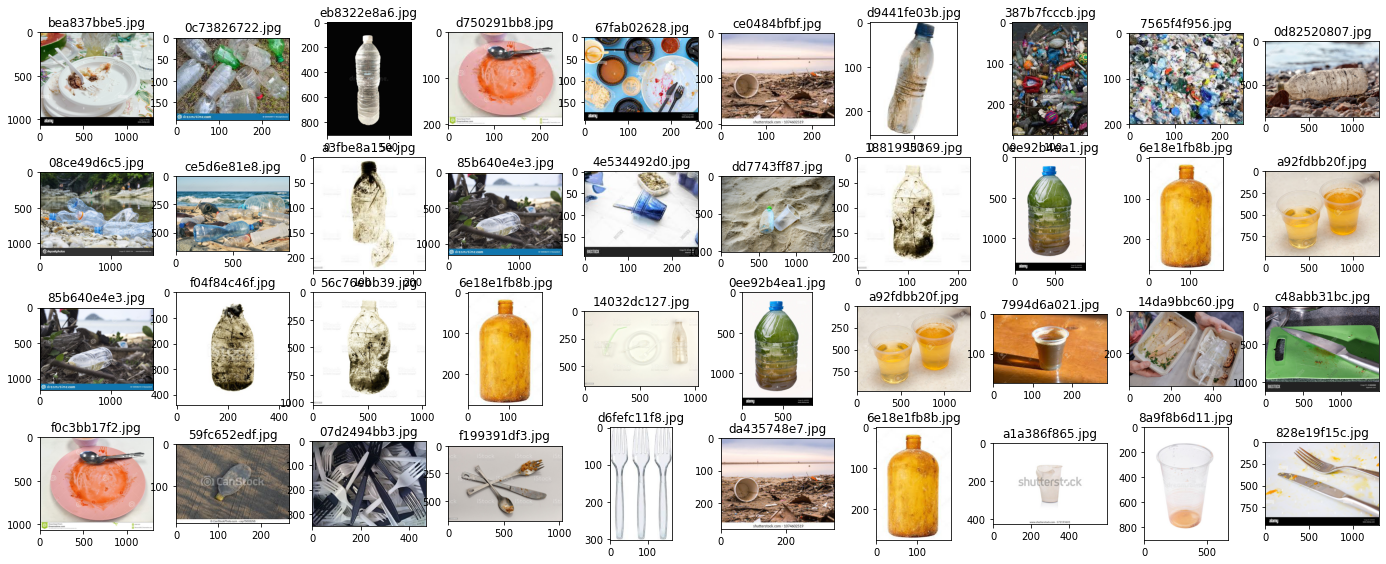

In [3]:
plt.figure(figsize=(24,12))
test_folder='/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set/plastic_dirty'
for i in range(40):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(5,10,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

    Redimensionner les images

In [4]:
IMG_WIDTH = 64
IMG_HEIGHT = 64
img_folder = "/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/"

    Déplacer les images scrappées vers la dataset correspondante

In [5]:
# Define the source and destination path
source = "/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/images/"
destination = "/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/"
  
# code to move the files from sub-folder to main folder.
files = os.listdir(source)
for file in files:
    file_name = os.path.join(source, file)
    shutil.move(file_name, destination)
print("Files Moved")

Files Moved


    Creation de dataset pour chacun des labels de plastic pour le trainning set

In [6]:
def create_dataset(img_folder):
   
    img_data_array_train=[]
    class_name_train=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array_train.append(image)
            class_name_train.append(dir1)
    return img_data_array_train, class_name_train

# extract the image array and class name
img_data_train, class_name_train =create_dataset("/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set/")

    Creation de dataset pour chacun des labels de plastic pour le test set

In [7]:
def create_dataset(img_folder):
   
    img_data_array_test=[]
    class_name_test=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array_test.append(image)
            class_name_test.append(dir1)
    return img_data_array_test, class_name_test

# extract the image array and class name
img_data_test, class_name_test =create_dataset("/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/")

    Convertir the class name en valeur unique binaire

In [8]:
target_dict_train={k: v for v, k in enumerate(np.unique(class_name_train))}
target_dict_train

{'plastic_clean': 0, 'plastic_dirty': 1}

In [9]:
target_dict_test={k: v for v, k in enumerate(np.unique(class_name_test))}
target_dict_test

{'plastic_clean': 0, 'plastic_dirty': 1}

    Convertir chaque class name avec leurs valeurs respectives

In [10]:
target_val_train=  [target_dict_train[class_name_train[i]] for i in range(len(class_name_train))]
len(target_val_train)

190

In [11]:
target_val_test=  [target_dict_test[class_name_test[i]] for i in range(len(class_name_test))]
len(target_val_test)

79

Creation de la matrice et le vecteur y

In [12]:
X_train = np.array(img_data_train)
y_train = np.vstack(target_val_train)
X_test = np.array(img_data_test)
y_test = np.vstack(target_val_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(190, 64, 64, 3) (190, 1) (79, 64, 64, 3) (79, 1)


    Creation de la data tranning et datatest

    Sauvegarde de la  dataset d'entrainenment dans le folder arrays

In [13]:
np.save('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/arrays/X_train', X_train)
np.save('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/arrays/y_train', y_train)
np.save('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/arrays/X_test', X_test)
np.save('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/arrays/y_test', y_test)

    Creation de model du deep learning et son entrainement

In [14]:
# Librairies
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

        L'architecture: Construction du réseau étape par étape

In [15]:
# 0. Initialisation
classifier = Sequential()

# 1. La Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# 2. Le Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Ajout d'une couche de convolution/pooling supplémentaire
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 3. Le Flattening
classifier.add(Flatten())

# 4. La couche fully-connected
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Paramètres d'entraînement
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2022-05-02 16:20:15.428193: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


        L'entrainement du modèle

In [40]:
# On génère de nouvelles images de training supplémentaires avec ImageDataGenerator
# qui au passage gère le preprocessing de l'image (notamme le rescaling)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_generator = train_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 20,
                                            class_mode = 'binary')

history = classifier.fit(training_generator,
               steps_per_epoch = 9, #180/20
               epochs = 20,
               validation_data = test_generator,
               validation_steps = 4) #80/20

Found 190 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Epoch 1/20
9/9 [==============================] - 1s 167ms/step - loss: 0.3053 - accuracy: 0.8706 - val_loss: 0.4389 - val_accuracy: 0.8228
Epoch 2/20
9/9 [==============================] - 1s 148ms/step - loss: 0.2952 - accuracy: 0.8529 - val_loss: 0.3911 - val_accuracy: 0.8228
Epoch 3/20
9/9 [==============================] - 1s 140ms/step - loss: 0.2529 - accuracy: 0.9118 - val_loss: 0.4433 - val_accuracy: 0.8228
Epoch 4/20
9/9 [==============================] - 1s 146ms/step - loss: 0.2288 - accuracy: 0.9000 - val_loss: 0.6572 - val_accuracy: 0.7595
Epoch 5/20
9/9 [==============================] - 1s 143ms/step - loss: 0.2375 - accuracy: 0.9118 - val_loss: 0.5820 - val_accuracy: 0.7722
Epoch 6/20
9/9 [==============================] - 1s 163ms/step - loss: 0.1987 - accuracy: 0.9235 - val_loss: 0.4061 - val_accuracy: 0.8608
Epoch 7/20
9/9 [==============================] - 1s 142ms/step - loss: 0.1748 

    Visualisation du modèle

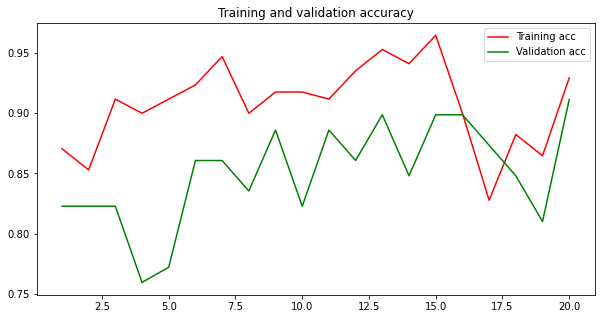

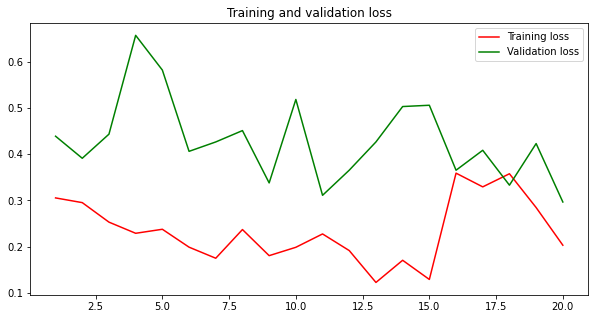

In [41]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

    Sauvegarde du modele

In [42]:
classifier.save('model_trained.h5')

    Evaluation du modèle

In [43]:
classifier.evaluate(test_generator)

4/4 [==============================] - 0s 81ms/step - loss: 0.2965 - accuracy: 0.9114


[0.2965036928653717, 0.9113923907279968]

    Prédictions

In [44]:
# Nouvelle prédiction
import numpy as np
from keras.preprocessing import image

def new_prediction(path):
    test_image = image.load_img(path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    #training_set.class_indices

    if result[0][0] == 0:
        return 'plastic_clean'
    else:
        return 'plastic_dirty'

In [45]:
new_prediction('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/plastic_clean/1d42a308b0.jpg'), new_prediction('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/plastic_dirty/24b6d66945.jpg')

('plastic_clean', 'plastic_dirty')

Visulisation

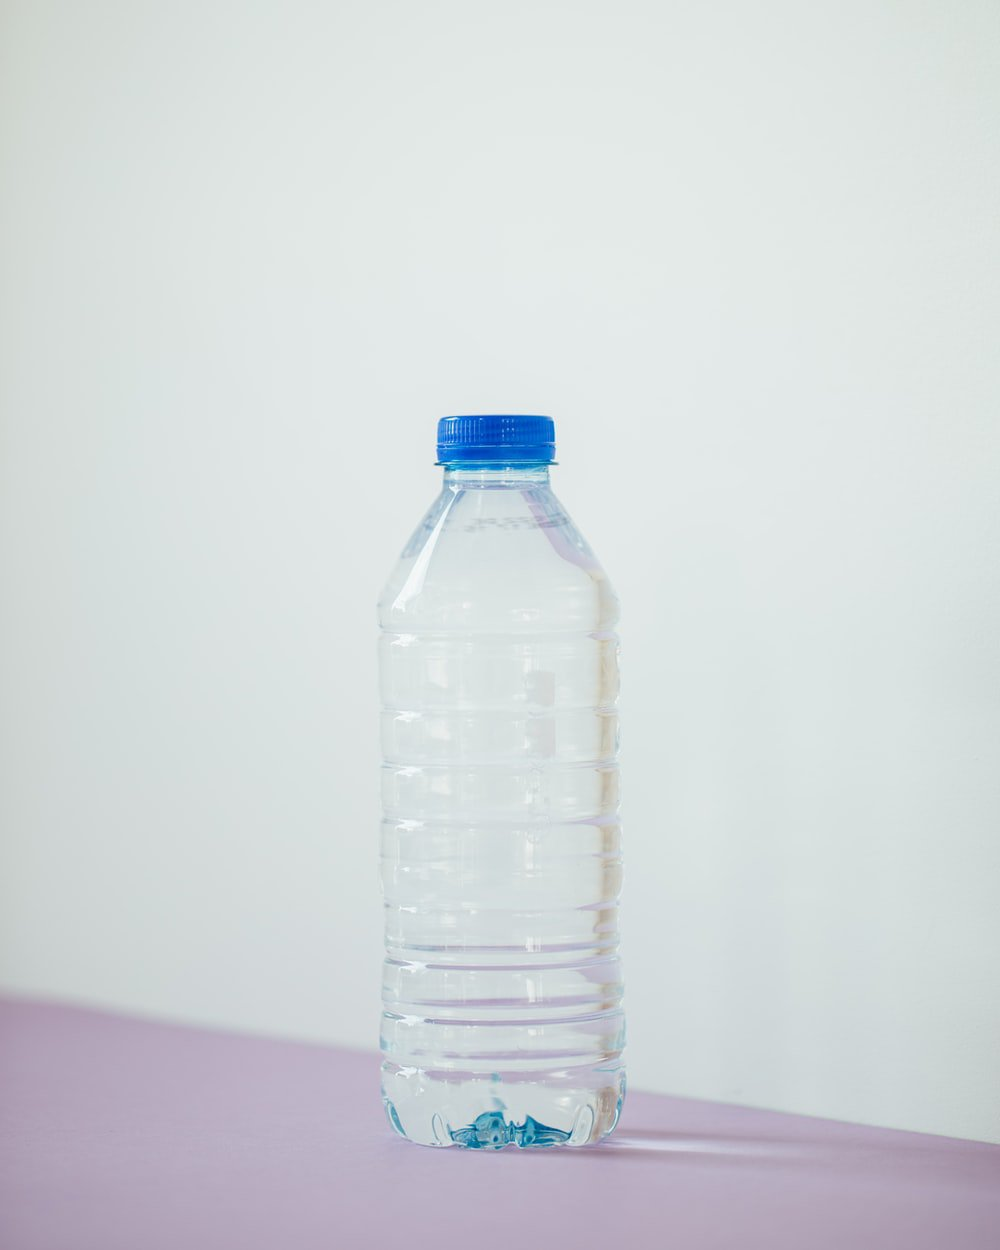

In [46]:
from IPython.display import Image 
Image(filename='/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/plastic_clean/1d42a308b0.jpg', width=200)

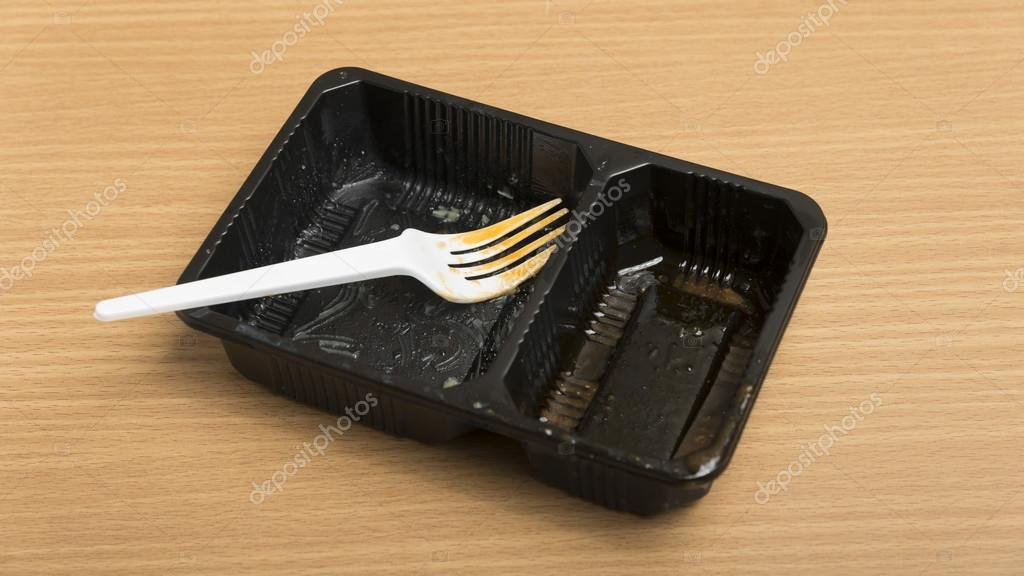

In [47]:
Image(filename='/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/plastic_dirty/1ec8383d5c.jpg', width=200)

    Amélioration de votre modèle

    Data Augmentation : concerne que les données entrainés

In [48]:
augmented_datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

    Visualisation des images de la dataaugmentation

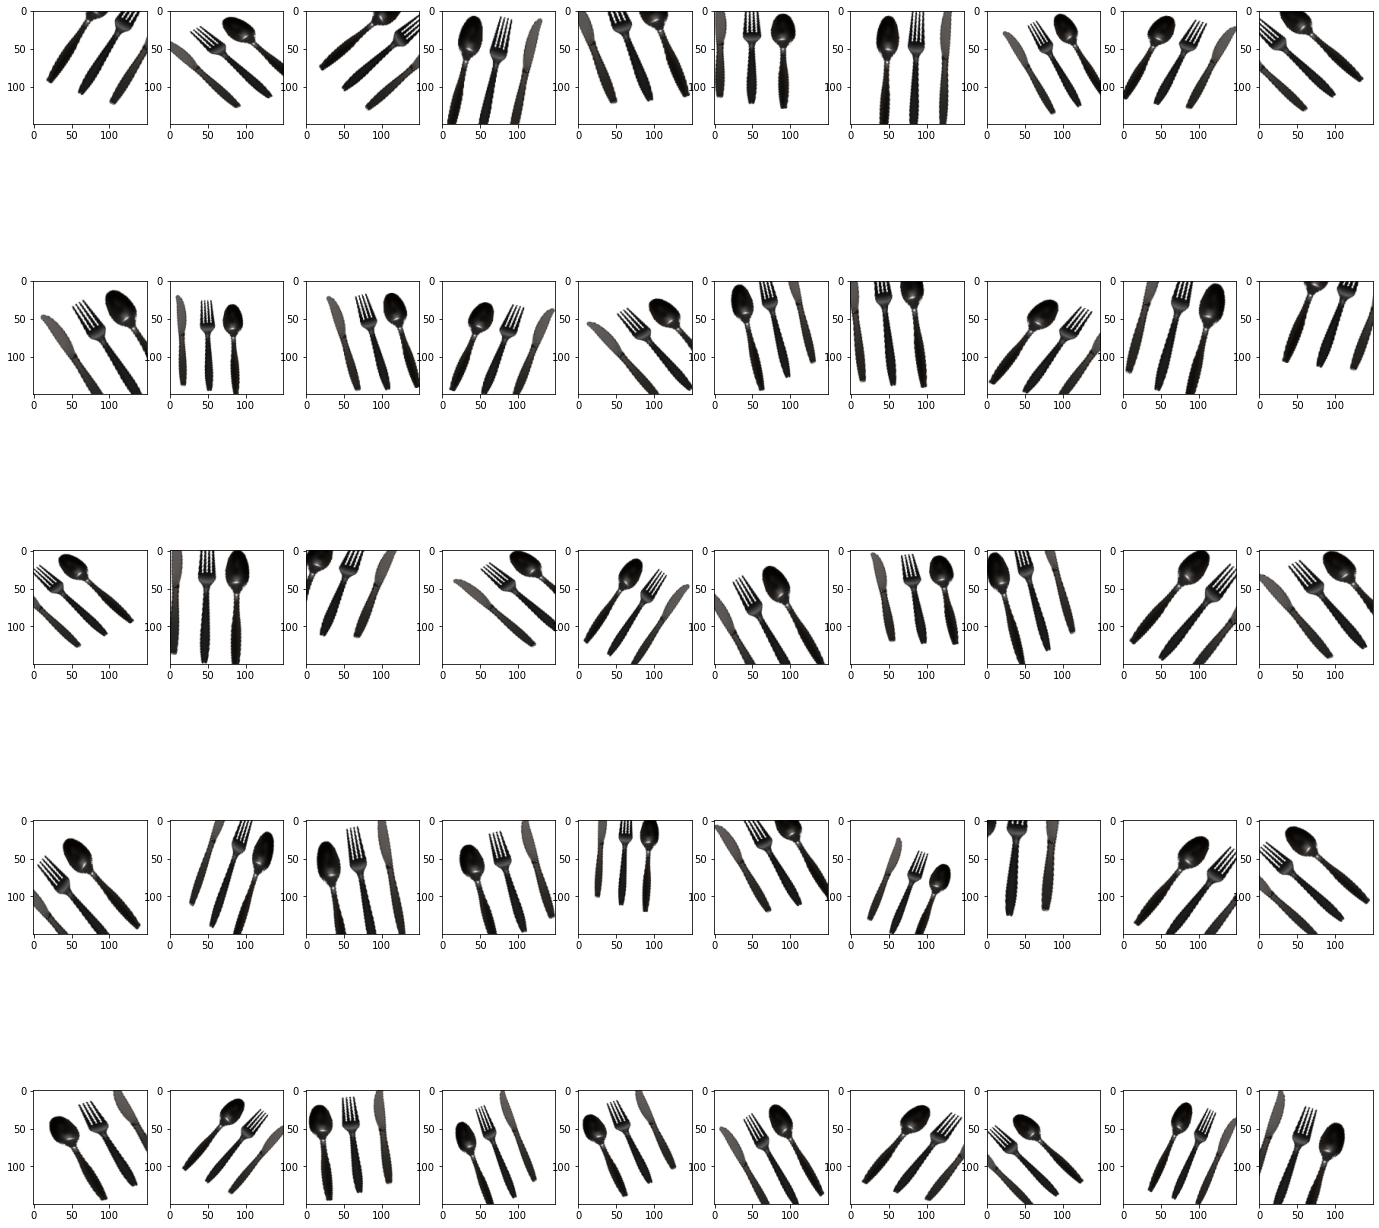

In [49]:
from keras.preprocessing import image

fnames = [os.path.join('../Projet P8 - Triof/triof/dataset/training_set/plastic_clean/' ,fname) for fname in os.listdir('../Projet P8 - Triof/triof/dataset/training_set/plastic_clean/')]
 

img_path = fnames[50]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
fig = plt.figure(figsize=(24,24))

for batch in augmented_datagen.flow(x, batch_size=1):
 ax = fig.add_subplot(5,10, i+1)
 ax.imshow(image.array_to_img(batch[0]))
 i += 1
 if i % 50 == 0:
  break

plt.show()

    Préparer les données puis entrainement

        Initialiser lesn nouvelles données

        Entrainer à nouveau le modèle

In [50]:
# On génère de nouvelles images de training supplémentaires avec ImageDataGenerator
# qui au passage gère le preprocessing de l'image (notamme le rescaling)
augmented_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_generator = augmented_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 20,
                                            class_mode = 'binary')

history = classifier.fit(training_generator,
               steps_per_epoch = 9, #179/20
               epochs = 20,
               validation_data = test_generator,
               validation_steps = 4) #80/20=4

Found 190 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Epoch 1/20
9/9 [==============================] - 1s 163ms/step - loss: 0.3813 - accuracy: 0.8765 - val_loss: 0.4952 - val_accuracy: 0.8101
Epoch 2/20
9/9 [==============================] - 1s 155ms/step - loss: 0.3503 - accuracy: 0.8765 - val_loss: 0.3591 - val_accuracy: 0.8861
Epoch 3/20
9/9 [==============================] - 1s 150ms/step - loss: 0.3468 - accuracy: 0.8529 - val_loss: 0.7814 - val_accuracy: 0.7342
Epoch 4/20
9/9 [==============================] - 1s 151ms/step - loss: 0.3275 - accuracy: 0.8588 - val_loss: 0.2548 - val_accuracy: 0.8861
Epoch 5/20
9/9 [==============================] - 1s 149ms/step - loss: 0.2725 - accuracy: 0.9000 - val_loss: 0.3426 - val_accuracy: 0.8734
Epoch 6/20
9/9 [==============================] - 1s 155ms/step - loss: 0.3031 - accuracy: 0.8647 - val_loss: 0.3642 - val_accuracy: 0.8608
Epoch 7/20
9/9 [==============================] - 1s 149ms/step - loss: 0.2518 

In [51]:
for data_batch, labels_batch in training_generator:
 print('data batch shape:', data_batch.shape)
 print('labels batch shape:', labels_batch.shape)
 break

data batch shape: (20, 64, 64, 3)
labels batch shape: (20,)
